In [13]:
pip install yfinance

In [14]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
d=yf.download('3MINDIA.NS',start='2005-10-11',interval='1d')

[*********************100%***********************]  1 of 1 completed


In [16]:
d=d[['Close']]

In [17]:
d

,Close
Date,
2005-10-11,799.349976
2005-10-13,802.500000
2005-10-14,785.500000
2005-10-17,800.500000
2005-10-18,800.150024
...,...
2021-12-15,24668.750000
2021-12-16,24926.599609
2021-12-17,24536.099609


In [18]:
t=np.random.random(2)

In [19]:
t[0]

0.6370910521668358

In [60]:
t1=[]
std1=[]
nstd=[]
ab=[]
abc=[]

In [61]:
f=d['Close'].tolist()

In [62]:
for i in range(0,500):
  t=np.random.random(2)*2
  ab.append(t)
  for j in range(0,len(d)-1):
    if f[j+1]>f[j]:
      t1.append(f[j])
      s=t[0]*np.std(t1)+t[1]*np.std(std1)
      nstd.append(s)
    else:
      std1.append(f[j])
      s=t[0]*np.std(t1)+t[1]*np.std(std1)
      nstd.append(s)
  nstd.append(nstd[-1])
  d['Moving average']=d.Close.rolling(50).mean()
  d['sss']=nstd
  d['sss1']=d.sss.rolling(50).mean()
  d['upper_band1']=d['Moving average']+t[0]*3*d['sss1']
  d['lower_band1']=d['Moving average']-t[0]*d['sss1']
  c=100000
  shares=1
  shares1=1
  short=0
  pr=0
  p=0
  asd=[]
  qwe=[]
  for i in range(52,2470):
    if d['lower_band1'][i-1]<d['Close'][i-1] and d['lower_band1'][i]>d['Close'][i]:
      p=1
      pr=(short-d['Close'][i])*shares1
      c=c+pr
      shares1=1
      shares=c/d['Close'][i]
    elif d['upper_band1'][i-1]<d['Close'][i-1] and d['upper_band1'][i]>d['Close'][i]:
      short=d['Close'][i]
      shares1=c/d['Close'][i]
      if p==0:
        pr=d['Close'][i]*shares
      p=1
      c=c+pr
      shares=1
    else:
      continue
  abc.append(c)
  t1=[]
  std1=[]
  nstd=[]





/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [63]:
abc

[100000,
 100000,
 122057.55004882812,
 100000,
 100000,
 121300.64705802084,
 121925.15624735592,
 100000,
 100000,
 100000,
 100000,
 346396.10812512663,
 100000,
 100000,
 115752.7096510971,
 140397.06792920205,
 100000,
 740805.9073533928,
 100000,
 100000,
 140986.76788037393,
 123149.16978786996,
 123792.30666359297,
 100000,
 141829.97676244107,
 100000,
 883835.2107842254,
 100000,
 100000,
 103902.84985351562,
 100000,
 743047.9076723474,
 183717.6155966718,
 100000,
 122580.1000366211,
 118183.26359894485,
 119921.19280957631,
 123297.95996226807,
 123007.40989990234,
 198500.9526494882,
 102167.39990234375,
 591194.8935379285,
 140870.5345114393,
 198760.25269831633,
 100000,
 100000,
 100000,
 100000,
 102639.19995117188,
 100000,
 100000,
 210956.66061238942,
 121649.3449987697,
 100000,
 141829.97676244107,
 133219.0456555436,
 199518.60481248482,
 123931.05660255782,
 204125.19722394235,
 100000,
 140972.46789258096,
 101495.09997558594,
 144933.52028903598,
 100000,
 10

In [64]:
t

array([0.65051404, 0.13409375])

In [65]:
d

,Close,Moving average,sss,sss1,upper_band1,lower_band1,std,upper_band,lower_band
Date,,,,,,,,,
2005-10-11,799.349976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-10-13,802.500000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2005-10-14,785.500000,NaN,4.504802,NaN,NaN,NaN,NaN,NaN,NaN
2005-10-17,800.500000,NaN,4.638896,NaN,NaN,NaN,NaN,NaN,NaN
2005-10-18,800.150024,NaN,4.643617,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-12-15,24668.750000,25800.458086,6422.628210,6366.209164,38224.383469,21659.149625,643.584793,26765.835275,24835.080897
2021-12-16,24926.599609,25790.272070,6423.310945,6368.712609,38219.083030,21647.335084,653.427486,26770.413299,24810.130842
2021-12-17,24536.099609,25775.903047,6423.944883,6371.138516,38209.448267,21631.387973,673.053267,26785.482947,24766.323147


In [66]:
ab

[array([1.4774942 , 0.66344299]),
 array([1.67828165, 0.17520507]),
 array([0.91876388, 0.09269369]),
 array([1.52178787, 0.18174709]),
 array([1.39872825, 1.08494677]),
 array([0.37462421, 0.9936488 ]),
 array([0.46444976, 1.07722689]),
 array([1.39460282, 0.40971094]),
 array([1.60568183, 1.88132442]),
 array([1.8550194 , 1.95523896]),
 array([1.96641766, 1.51309775]),
 array([0.55495839, 0.01935842]),
 array([1.56635134, 1.02591536]),
 array([1.42488356, 1.71887382]),
 array([0.34670841, 1.38716685]),
 array([0.75596547, 1.25826224]),
 array([1.87196962, 1.27510154]),
 array([0.10016979, 0.76500074]),
 array([1.23887523, 1.43185878]),
 array([1.29571392, 1.11111802]),
 array([0.79639432, 1.09819301]),
 array([0.68074824, 0.55833959]),
 array([0.78443796, 0.58801981]),
 array([1.7146709 , 1.47054112]),
 array([1.16828848, 0.0055737 ]),
 array([1.29264644, 1.55763282]),
 array([0.22121604, 0.23760066]),
 array([1.17442271, 1.67206305]),
 array([1.19737495, 1.1864986 ]),
 array([1.1264

In [67]:
wew=np.array(abc)

In [68]:
ab[63][1]

0.9432871619756957

In [69]:
wew.argmax()

212

In [70]:
len(ab)

500

In [71]:
ab[wew.argmax()]

array([0.27628555, 0.07246691])

In [72]:
wew.max()

896483.9959361274

In [73]:
abc[245]

100000

In [75]:
d['upper_band1']=d['Moving average']+ab[wew.argmax()][0]*3*d['sss1']
d['lower_band1']=d['Moving average']-ab[wew.argmax()][0]*3*d['sss1']

In [76]:
wew

array([100000.        , 100000.        , 122057.55004883, 100000.        ,
       100000.        , 121300.64705802, 121925.15624736, 100000.        ,
       100000.        , 100000.        , 100000.        , 346396.10812513,
       100000.        , 100000.        , 115752.7096511 , 140397.0679292 ,
       100000.        , 740805.90735339, 100000.        , 100000.        ,
       140986.76788037, 123149.16978787, 123792.30666359, 100000.        ,
       141829.97676244, 100000.        , 883835.21078423, 100000.        ,
       100000.        , 103902.84985352, 100000.        , 743047.90767235,
       183717.61559667, 100000.        , 122580.10003662, 118183.26359894,
       119921.19280958, 123297.95996227, 123007.4098999 , 198500.95264949,
       102167.39990234, 591194.89353793, 140870.53451144, 198760.25269832,
       100000.        , 100000.        , 100000.        , 100000.        ,
       102639.19995117, 100000.        , 100000.        , 210956.66061239,
       121649.34499877, 1

In [79]:
e=d[['Close','upper_band1','lower_band1']]

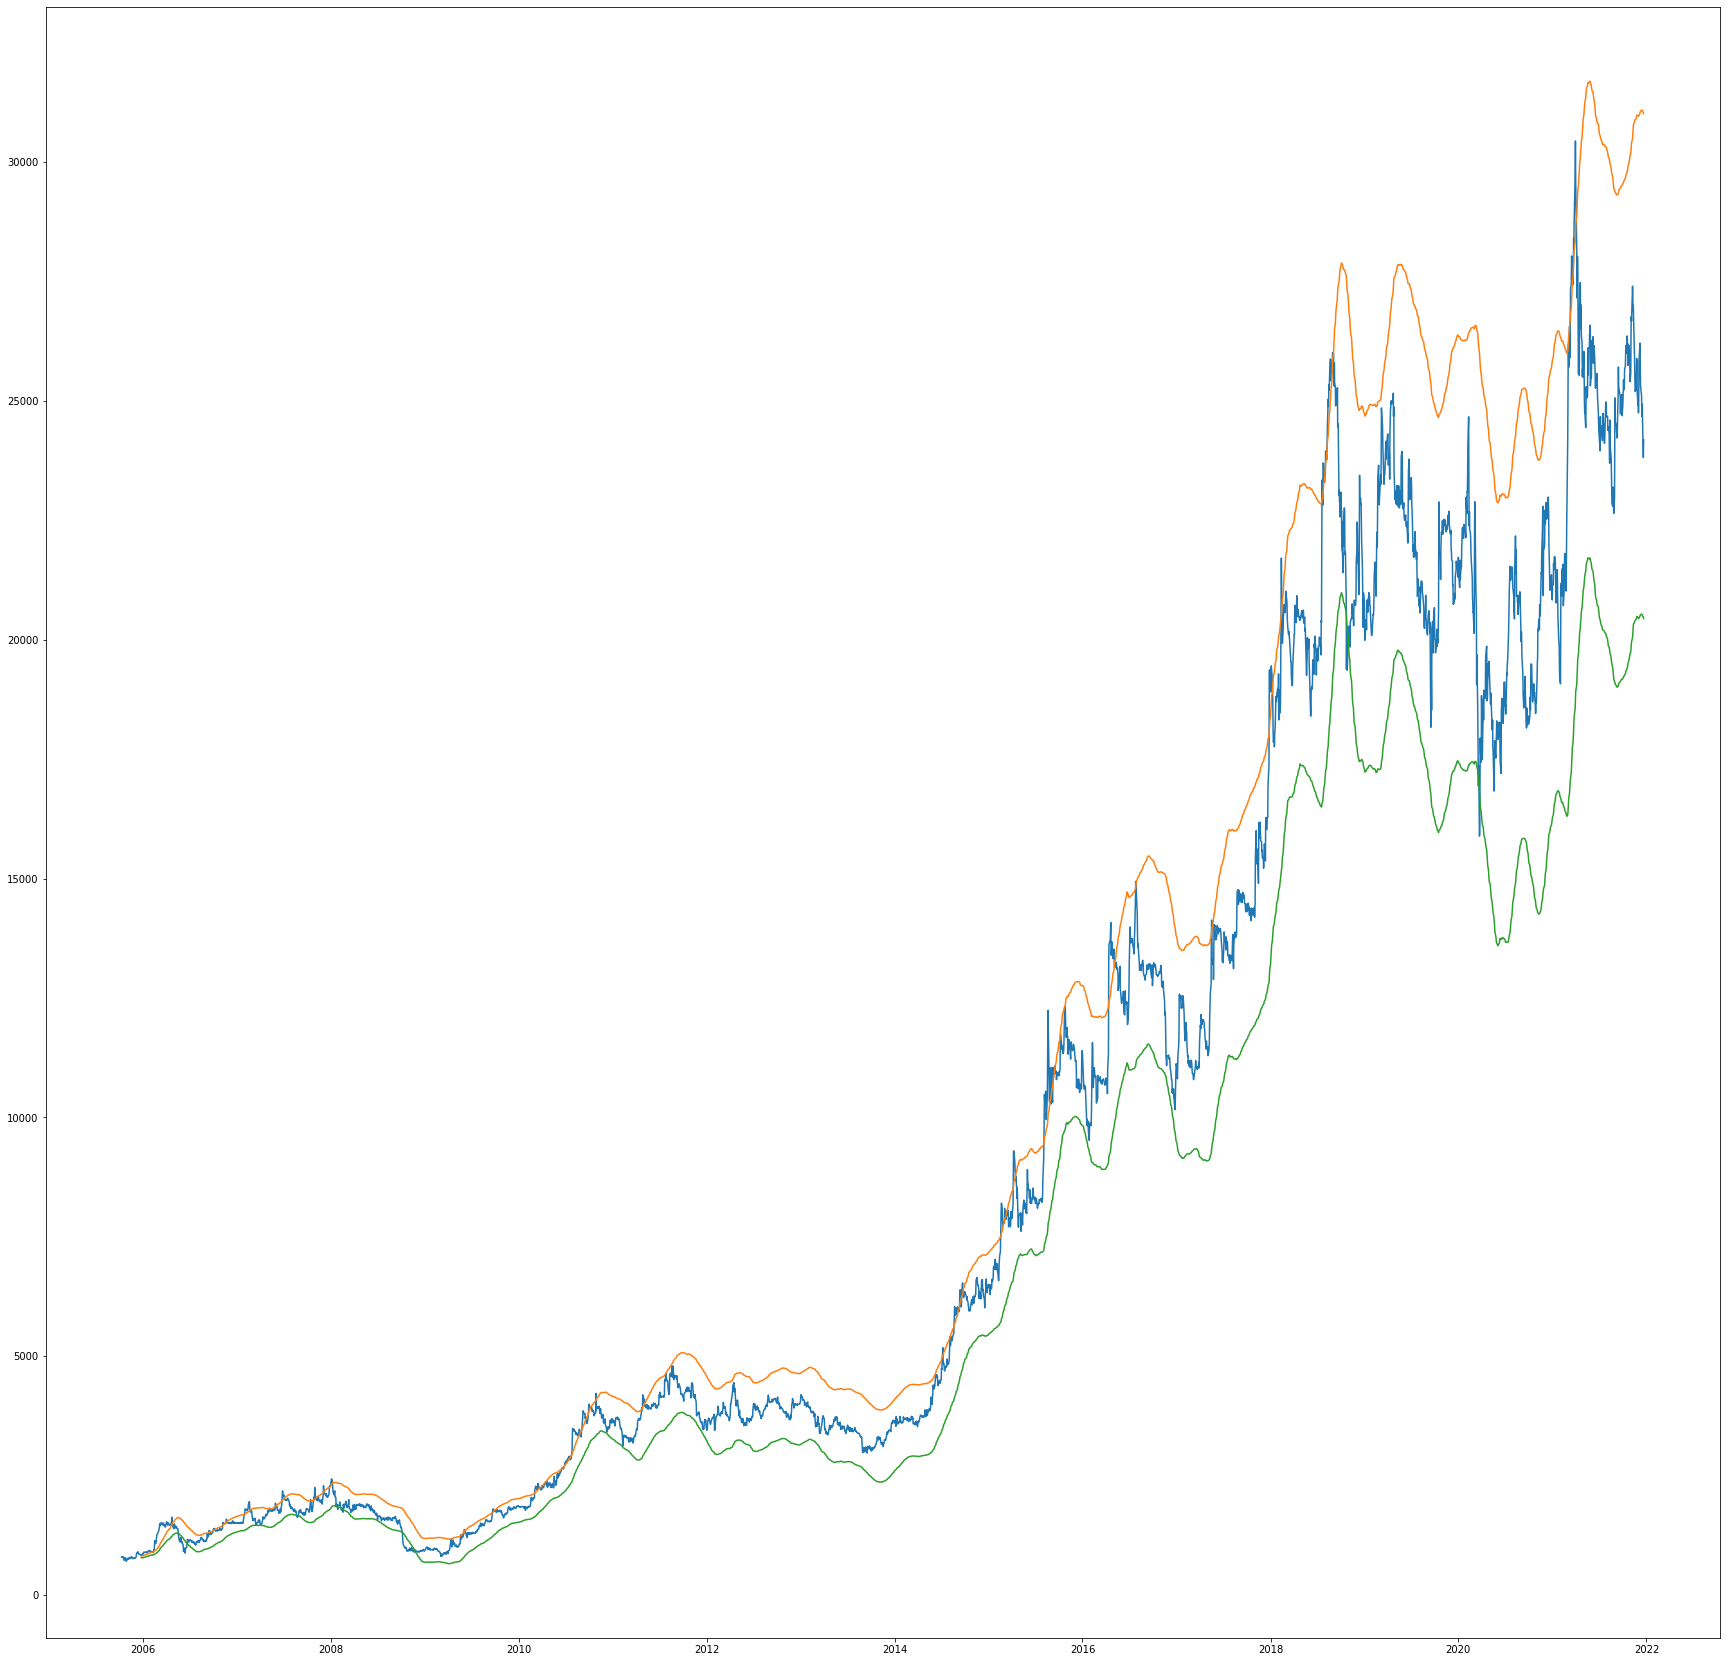

In [80]:
plt.figure(figsize=(30, 30))
plt.plot(e)
plt.show()

Original Bollinger Band Strategy

In [37]:
d['std']=d.Close.rolling(50).std()

In [38]:
d['upper_band']=d['Moving average']+1.5*d['std']
d['lower_band']=d['Moving average']-1.5*d['std']

In [81]:
c=100000
t=0
shares=1
shares1=1
short=0
pr=0
p=0

In [82]:
asd=[]
qwe=[]

In [83]:
for i in range(52,2470):
  if d['lower_band1'][i-1]<d['Close'][i-1] and d['lower_band1'][i]>d['Close'][i]:
    p=1
    pr=(short-d['Close'][i])*shares1
    c=c+pr
    shares1=1
    shares=c/d['Close'][i]
  elif d['upper_band1'][i-1]<d['Close'][i-1] and d['upper_band1'][i]>d['Close'][i]:
    short=d['Close'][i]
    shares1=c/d['Close'][i]
    if p==0:
      pr=d['Close'][i]*shares
    p=1
    c=c+pr
    shares=1
  else:
    continue
  abc.append(c)
  t1=[]
  std1=[]
  nstd=[]

In [87]:
print('ROI:',c/100000)

ROI: 5.746783119045413
